### Week 3 Workbook: Using Internal Measure to Evaluate Relative Intensity

### STEP 1
Import LIbraries and Dataset

In [1]:
# we have 10 Hz datasets from a number of athletes -- over separate games (UM Women's Basketball from 2019)


#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates

from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv("../Data/WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])

### Step 2

In [2]:
columns_to_keep = ['Seconds','Heart Rate', 'Player Load', 'AthleteID']

df_wbb = df[columns_to_keep]
df_wbb

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-01-08 17:39:42,0.0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,83,0.0,Athlete 1
...,...,...,...,...
2019-03-08 16:47:03,11484.4,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.5,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.6,101,1001.5,Athlete 5


### Step 3

In [3]:
Game_3_9_df = df_wbb.loc['2019-03-09']
Game_3_9_df

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-03-09 15:57:49,0.0,0,0.0,Athlete 10
2019-03-09 15:57:49,0.1,0,0.0,Athlete 10
2019-03-09 15:57:49,0.2,0,0.0,Athlete 10
2019-03-09 15:57:49,0.3,0,0.0,Athlete 10
2019-03-09 15:57:49,0.4,0,0.0,Athlete 10
...,...,...,...,...
2019-03-09 19:08:14,11348.4,108,470.6,Athlete 8
2019-03-09 19:08:14,11348.5,106,470.6,Athlete 8
2019-03-09 19:08:14,11348.6,106,470.6,Athlete 8


### Step 4 -- Question 1 in Coursera MC questions

Our biggest concern for this analysis is how much of the heart rate data might not be "real".    So, we can start by getting a count (ie. a sum) of all the zeroes in the dataset this way: (axis=0 is used for columns)

In [4]:
(Game_3_9_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the entire team dataframe

Seconds           13
Heart Rate     69452
Player Load      391
AthleteID          0
dtype: int64

Let's jump back to the whole team dataset and get a more granular look at the heart rate data.  Let's get it broken down for each player.  We'll use the "agg" method to find the minimum ("min") value, average, maximum and length of the values according to each athlete ID (ie. player) using the groupby method that we have used before:  

### Step 5 -- Question #2 in coursera MC questions: Which player had the highest % of missing HR data? (Answer: Athlete 10 with 8.77% missing)

In [5]:
%%capture
Game_3_9_df.loc[Game_3_9_df['Heart Rate'] ==0, 'Heart Rate'] = np.nan

In [6]:
DataCount = Game_3_9_df.groupby('AthleteID')['Heart Rate','Player Load'].count()

DataCount['Missing HR values']= (DataCount['Player Load']-DataCount['Heart Rate'])
DataCount['% HR missing'] = DataCount['Missing HR values']/DataCount['Player Load']*100

print(DataCount.sort_values(by='% HR missing', ascending = False))

            Heart Rate  Player Load  Missing HR values  % HR missing
AthleteID                                                           
Athlete 10      104229       114261              10032      8.779899
Athlete 11      105176       113469               8293      7.308604
Athlete 13      105498       113346               7848      6.923932
Athlete 3       106787       113519               6732      5.930285
Athlete 9       108116       113819               5703      5.010587
Athlete 5       108154       113629               5475      4.818312
Athlete 2       109071       113829               4758      4.179954
Athlete 6       108862       113579               4717      4.153056
Athlete 12      109057       113689               4632      4.074273
Athlete 8       109899       113489               3590      3.163302
Athlete 1       110378       113379               3001      2.646875
Athlete 4       110829       113749               2920      2.567056
Athlete 7       111604       11335

### NOTE in KEY: not dropping anyone from this dataset


### Step 6


In [7]:
Rank_Max_PL = Game_3_9_df.groupby(['AthleteID'])[['Player Load', "Heart Rate"]].max()
print("Maximum playerload (and HR) by player ID")


print(Rank_Max_PL.sort_values(by='Player Load', ascending = False))

Maximum playerload (and HR) by player ID
            Player Load  Heart Rate
AthleteID                          
Athlete 10       1038.8       234.0
Athlete 1         919.4       212.0
Athlete 7         904.5       206.0
Athlete 9         890.8       209.0
Athlete 5         790.5       225.0
Athlete 2         549.3       213.0
Athlete 8         470.6       189.0
Athlete 4         422.6       181.0
Athlete 12        355.9       195.0
Athlete 13        344.8       210.0
Athlete 11        342.1       216.0
Athlete 3         337.3       210.0
Athlete 6         265.9       185.0


In [8]:
Ath10_Game_3_9_df = Game_3_9_df.loc[Game_3_9_df['AthleteID'] == 'Athlete 10'] 
Ath6_Game_3_9_df = Game_3_9_df.loc[Game_3_9_df['AthleteID'] == 'Athlete 6'] 

AthleteID
Athlete 10    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

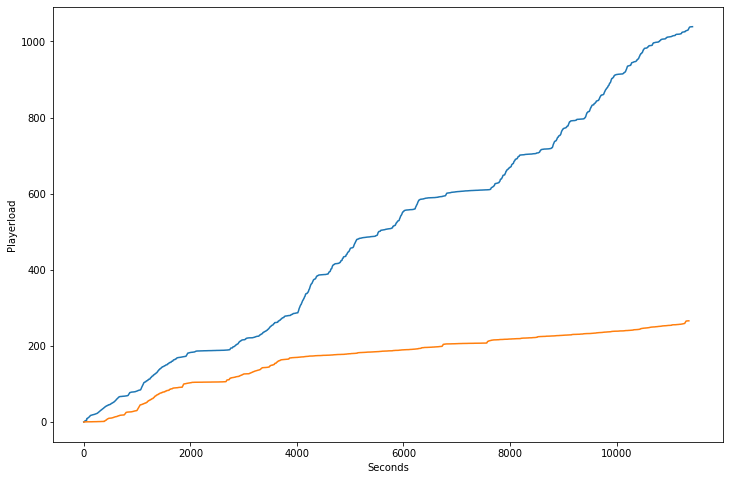

In [9]:
(Game_3_9_df.query("AthleteID == 'Athlete 10' or AthleteID == 'Athlete 6'")
    .groupby("AthleteID")
    .plot(x="Seconds",y="Player Load", ax=plt.gca(), ylabel="Playerload", figsize=(12,8), legend=False))

AthleteID
Athlete 10    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

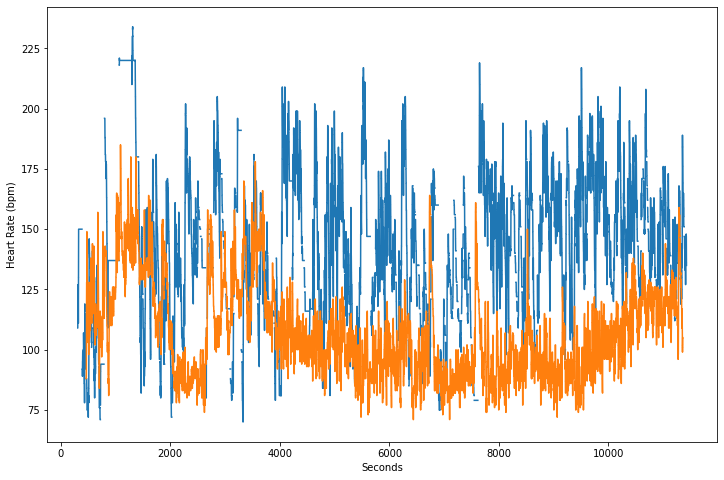

In [10]:
(Game_3_9_df.query("AthleteID == 'Athlete 10' or AthleteID == 'Athlete 6'")
    .groupby("AthleteID")
    .plot(x="Seconds",y="Heart Rate", ax=plt.gca(), ylabel="Heart Rate (bpm)", figsize=(12,8), legend=False))

### Step 7 -  Question #3 in coursera MC questions -- Approximately how many minutes into the collection did the half-time period appear to have occured? (about 7000-7500 seconds; or approximately 120 minutes)

<AxesSubplot:xlabel='Seconds'>

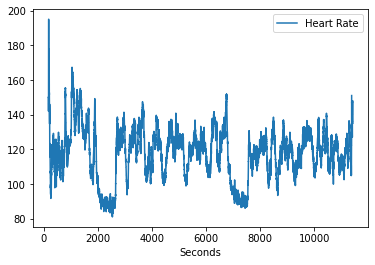

In [11]:
Team_Mean_HR2 = Game_3_9_df.groupby(['Seconds'])[['Heart Rate']].mean()
Team_Mean_HR2.plot(y='Heart Rate')

### Step 8  Question #4 in coursera MC questions: "Which player had the 5th highest TRIMP score?"  (Answer Athlete 5 with score of 248)


In [12]:
Rank_Mean_HR = Game_3_9_df.groupby(['AthleteID'])[['Heart Rate']].mean()

print("Average heart rate by player ID")
print(Rank_Mean_HR.sort_values(by='Heart Rate', ascending = False))

Average heart rate by player ID
            Heart Rate
AthleteID             
Athlete 10  143.739545
Athlete 9   143.422047
Athlete 1   143.249696
Athlete 7   140.687171
Athlete 5   132.837472
Athlete 2   120.254834
Athlete 8   113.139310
Athlete 13  109.495981
Athlete 11  108.726088
Athlete 6   107.771711
Athlete 3    93.868420
Athlete 12   90.120524
Athlete 4    84.351072


In [13]:
t= 12000/60  # 12000 seconds divided by 60 to provide minutes (200 minutes in this double-overtime game with warm-up time included)

HRmax=200
HRrest=60

FHRR = (Rank_Mean_HR['Heart Rate']-HRrest)/ (HRmax-HRrest)

kval = (np.exp(1.67 * FHRR))
TRIMP = t * FHRR * kval
InternalLoads=pd.concat([TRIMP, Rank_Mean_HR], axis=1)  # combining two calculations
InternalLoads.columns=['TRIMP Values','MEAN HR Values']
print(InternalLoads.sort_values(by='TRIMP Values', ascending = False))

            TRIMP Values  MEAN HR Values
AthleteID                               
Athlete 10    324.822671      143.739545
Athlete 9     322.367890      143.422047
Athlete 1     321.041173      143.249696
Athlete 7     301.791750      140.687171
Athlete 5     248.080302      132.837472
Athlete 2     176.621997      120.254834
Athlete 8     143.089162      113.139310
Athlete 13    127.610514      109.495981
Athlete 11    124.477146      108.726088
Athlete 6     120.657609      107.771711
Athlete 3      72.469069       93.868420
Athlete 12     61.631714       90.120524
Athlete 4      46.512651       84.351072


### Step 9 -  Question #5 in coursera MC question: The top 4 players based on TRIMP and playerload from March 8th were Athletes 1, 5, 9 and 10.  Which player is apparently is the one that appeared to play the most on March 9th? (Based on TRIMP and Player load)?  (Answer: Athlete 7). (Incidentally -- we through them out in the workbook as they had no heart rate data!)

In [14]:
InternalLoads['Player Load']=Rank_Max_PL['Player Load']

print(InternalLoads.sort_values(by='TRIMP Values', ascending = False))

            TRIMP Values  MEAN HR Values  Player Load
AthleteID                                            
Athlete 10    324.822671      143.739545       1038.8
Athlete 9     322.367890      143.422047        890.8
Athlete 1     321.041173      143.249696        919.4
Athlete 7     301.791750      140.687171        904.5
Athlete 5     248.080302      132.837472        790.5
Athlete 2     176.621997      120.254834        549.3
Athlete 8     143.089162      113.139310        470.6
Athlete 13    127.610514      109.495981        344.8
Athlete 11    124.477146      108.726088        342.1
Athlete 6     120.657609      107.771711        265.9
Athlete 3      72.469069       93.868420        337.3
Athlete 12     61.631714       90.120524        355.9
Athlete 4      46.512651       84.351072        422.6


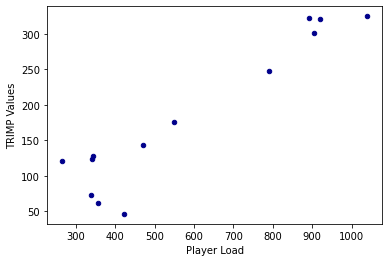

In [15]:
ax1=InternalLoads.plot.scatter(x='Player Load', y='TRIMP Values', c='DarkBlue')